In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter
import torch

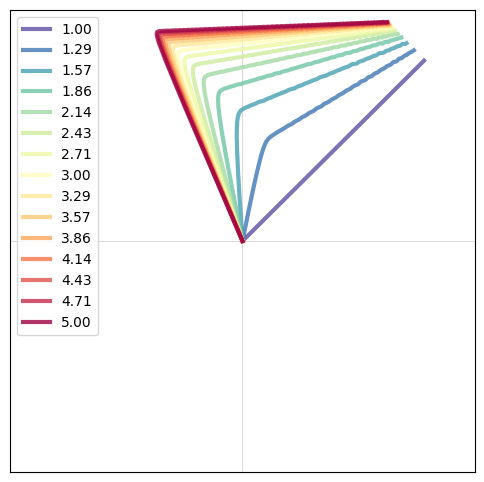

In [100]:
t0_1 = 10.
speed=3.0

def sigmoid(t, k=0.1, t0=10):
    return 1 / (1 + np.exp(-k * (t - t0)))

def dc_dt(t, c, a):
    c1=c[0]
    c2=c[1]
    alpha=sigmoid(t, k=0.1, t0=t0_1)
    #beta=1-alpha
    grad_benign_c1=(1 / (2 * a)) * (1 - c1)
    grad_benign_c2=(a / 2) * (1 - c2)
    grad_conf_c1=(a / 2) * (alpha - c1)
    grad_conf_c2=(1 / (2 * a)) * (alpha - c2)
    return  speed*(grad_benign_c1+grad_conf_c1), speed*(grad_benign_c2+grad_conf_c2)

t_eval = np.linspace(0, 25, 200)

norm = mcolors.Normalize(vmin=1, vmax=5)
def sep_col_to_color(sep_col, cmap):
    return plt.get_cmap(cmap)(norm(sep_col))

a_values = np.linspace(1.0,5.0, 15)

plt.figure(figsize=(6, 6))
plt.axline([0,0.5], [1,0.5], c="grey", alpha=0.4, linewidth=0.5)
plt.axline([0.5,0], [0.5,1], c="grey", alpha=0.4, linewidth=0.5)

for i, a in enumerate(a_values):
    cmap = "Spectral_r"
    color = sep_col_to_color(a, cmap)
    target = i / ( len(a_values) - 1. )
    sol_c = solve_ivp(dc_dt, [0, 25], [0.5,0.5], args=(a, ), t_eval=t_eval, method='RK45')
    smoothed_x = sol_c.y[0]
    smoothed_y = sol_c.y[1]
    #smoothed_y = sol_c2.y[0]

    n_points = len(smoothed_x)
    #for j in range(n_points - 1):
    #    alpha_value = min( 0.2 + 0.8 * j / (n_points - 1), 1)
    #    plt.plot(smoothed_x[j:j+2], smoothed_y[j:j+2], c=color, alpha=alpha_value, linewidth=3)
    plt.plot(smoothed_x, smoothed_y, c=color, alpha=0.8, linewidth=3, label=f"{a:.2f}")
    #print(a)

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.xticks([])
plt.yticks([])
plt.legend()


In [101]:
import sys
sys.path.append("../")


In [127]:
import utils
config1=utils.load_config("../data/2x2/detailed/sep_col=0.2_sep_size=0.4/seed=0/seed=0.yaml")
config1["n_samples_train"]=[0,0,0,0]
config1["n_samples_test"]=[0,0,0,0]
config1["n_samples_train_gen"]=[0,0,0,0]
config1["n_samples_test_gen"]=[32,32,32,32]
mse_pix_1=np.load("../data/2x2/detailed/sep_col=0.2_sep_size=0.4/seed=0/mse_pix.npy")
_,_,_,x_te1,_,l_te1=utils.generate_data(config1,seed=42,forgen=True)
config1=utils.load_config("../data/2x2/detailed/sep_col=0.8_sep_size=0.2/seed=0/seed=0.yaml")
config1["n_samples_train"]=[0,0,0,0]
config1["n_samples_test"]=[0,0,0,0]
config1["n_samples_train_gen"]=[0,0,0,0]
config1["n_samples_test_gen"]=[32,32,32,32]
mse_pix_2=np.load("../data/2x2/detailed/sep_col=0.8_sep_size=0.2/seed=0/mse_pix.npy")
_,_,_,x_te2,_,l_te2=utils.generate_data(config1,seed=42,forgen=True)

In [128]:
mse_pix_1,mse_pix_2

(array([[0.        , 0.04297328, 0.00740884, 0.04420659],
        [0.04297328, 0.        , 0.04420659, 0.00088467],
        [0.00740884, 0.04420659, 0.        , 0.04297327],
        [0.04420659, 0.00088467, 0.04297327, 0.        ]]),
 array([[0.        , 0.03686677, 0.0828904 , 0.07516428],
        [0.03686677, 0.        , 0.07516428, 0.0305714 ],
        [0.0828904 , 0.07516428, 0.        , 0.03686677],
        [0.07516428, 0.0305714 , 0.03686677, 0.        ]]))

In [124]:
imgs={}
for s in range(2):
    for l in range(4):
        label=["00","01","10","11"][l]
        name="set"+str(s)+"_"+label
        xs=x_te1[l_te1==l][16] if s==0 else x_te2[l_te2==l][16]
        xs=np.clip(xs.transpose(1,2,0),0,1).astype(np.float32)
        imgs[name]=xs

In [125]:
torch.save(imgs,"imgs.pth")

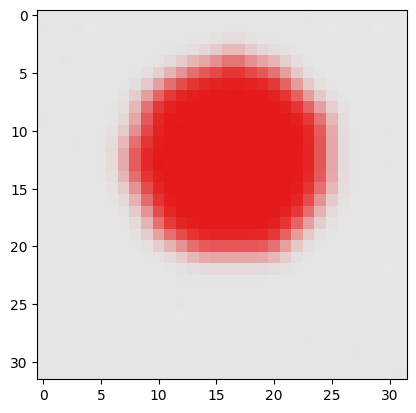

In [119]:
plt.imshow(imgs["set1_00"])

In [165]:
plot_data=torch.load("../data/2x2/detailed/sep_col=0.2_sep_size=0.3/seed=100/plot_data.pth")
plot_data.keys()

dict_keys(['min_vlb', 'save_steps', 'losses', 'val_losses', 'te_losses', 'l_tr', 'rights_tr', 'l_te', 'rights_te', 'classprobs_pred_tr', 'classprobs_pred_te', 'rightprobss_tr', 'rightprobss_te'])

In [169]:
steps=plot_data["save_steps"]
d=plot_data["rights_te"]
accs=d.prod(-1).mean(1)

In [172]:
data={"steps":steps,"accs":accs}
torch.save(data,"../../../from_core/fig_prompt/data_andrew_match.pth")

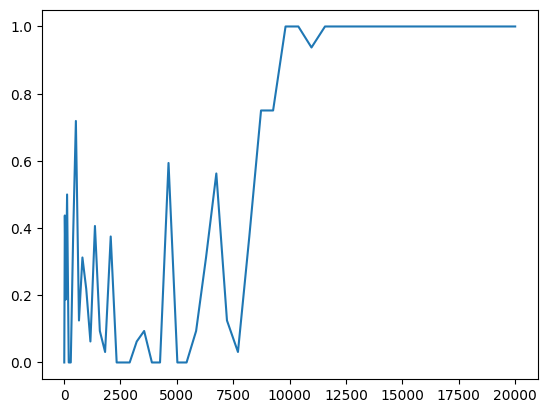

In [170]:
plt.plot(steps,accs)

In [ ]:
import os
import torch

fol="/home/ubuntu/core/concept-learning/data/2x2/detailed/sep_col=0.2_sep_size=0.4/seed=0"
logs=torch.load(os.path.join(fol,"logs.pth"))
plot_data=torch.load(os.path.join(fol,"plot_data.pth"))

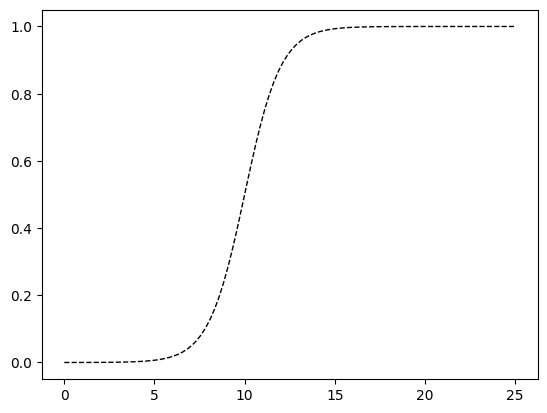

In [76]:
t0_1 = 10.

def sigmoid(t, k=0.1, t0=10):
    return 1 / (1 + np.exp(-k * (t - t0)))

def dc1_dt(t, c1, a):
    if t<0.1:
        print(c1,a)
    source = sigmoid(t, 1, t0_1)
    return (1 / (2 * a)) * (source - c1)

def dc2_dt(t, c2, a):
    return (a / 2) * (1 - c2)

t_eval = np.linspace(0, 25, 100)
plt.plot(t_eval, sigmoid(t_eval,1,t0_1), c="black", linestyle="--", linewidth=1)

In [ ]:

    
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_color('grey')
        spine.set_linewidth(0.5)